# Data Exploration  
Objective: Quick exploration of solar generation and weather data to identify patterns and feature engineering opportunities.

## 1. Setup and imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from typing import Tuple, Dict, Any
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Data

In [2]:
def load_and_inspect_data() -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Load generation and weather data with basic inspection.
    
    Returns:
        Tuple containing generation and weather DataFrames.
    """
    # Load datasets directly
    generation_df = pd.read_csv('../data/raw/Plant_1_Generation_Data.csv')
    weather_df = pd.read_csv('../data/raw/Plant_1_Weather_Sensor_Data.csv')
    
    # Convert datetime columns
    generation_df['DATE_TIME'] = pd.to_datetime(generation_df['DATE_TIME'])
    weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'])
    
    print("=== DATA OVERVIEW ===")
    print(f"Generation Data: {len(generation_df):,} records")
    print(f"Weather Data: {len(weather_df):,} records")
    print(f"Date Range: {generation_df['DATE_TIME'].min()} to {generation_df['DATE_TIME'].max()}")
    
    return generation_df, weather_df

# Load data
gen_df, weather_df = load_and_inspect_data()

=== DATA OVERVIEW ===
Generation Data: 68,778 records
Weather Data: 3,182 records
Date Range: 2020-05-15 00:00:00 to 2020-06-17 23:45:00


## 3. Data Structure Overview

In [3]:
def inspect_data_structure(gen_df: pd.DataFrame, weather_df: pd.DataFrame) -> None:
    """
    Quick inspection of data structure and missing values.
    
    Args:
        gen_df: Generation dataframe.
        weather_df: Weather dataframe.
    """
    print("=== GENERATION DATA ===")
    print(gen_df.info())
    print("\nMissing values:")
    print(gen_df.isnull().sum())
    
    print("\n=== WEATHER DATA ===")
    print(weather_df.info())
    print("\nMissing values:")
    print(weather_df.isnull().sum())

inspect_data_structure(gen_df, weather_df)

=== GENERATION DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB
None

Missing values:
DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

=== WEATHER DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  --

## 4. Target Variable Analysis

=== AC_POWER STATISTICS ===
count    68778.000000
mean       307.802752
std        394.396439
min          0.000000
25%          0.000000
50%         41.493750
75%        623.618750
max       1410.950000
Name: AC_POWER, dtype: float64


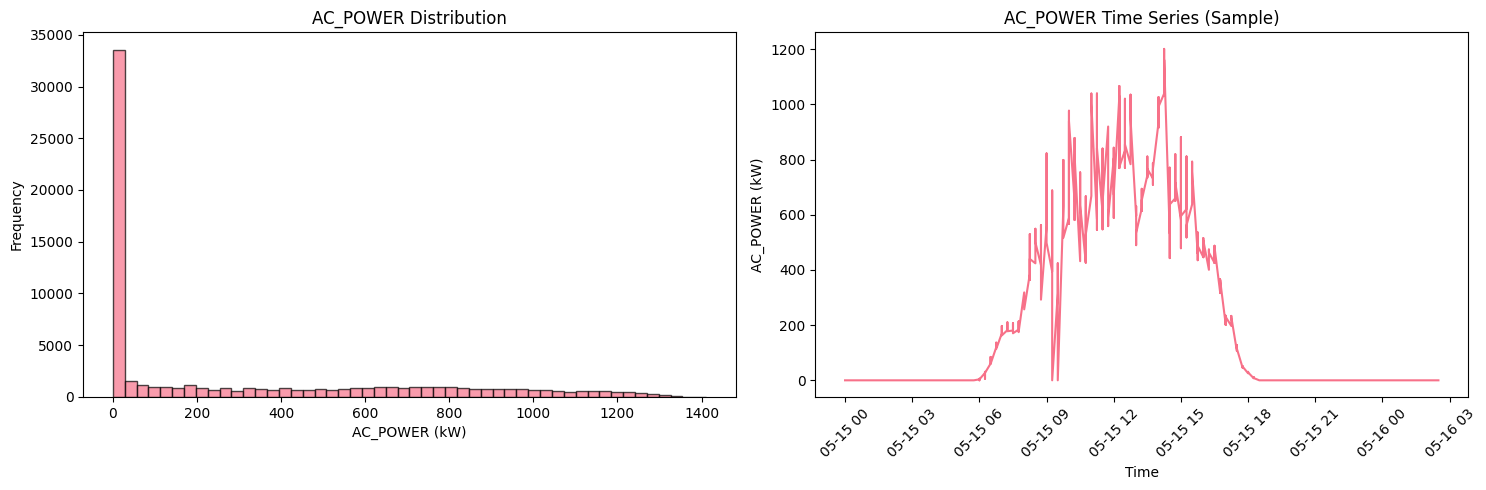

In [4]:
def analyze_target_variable(gen_df: pd.DataFrame) -> None:
    """
    Analyze AC_POWER (target variable) distribution and basic stats.
    
    Args:
        gen_df: Generation dataframe.
    """
    target = gen_df['AC_POWER']
    
    print("=== AC_POWER STATISTICS ===")
    print(target.describe())
    
    # Plot distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    ax1.hist(target, bins=50, alpha=0.7, edgecolor='black')
    ax1.set_title('AC_POWER Distribution')
    ax1.set_xlabel('AC_POWER (kW)')
    ax1.set_ylabel('Frequency')
    
    # Time series plot (sample)
    sample_data = gen_df.head(2000)  # First ~2 days
    ax2.plot(sample_data['DATE_TIME'], sample_data['AC_POWER'])
    ax2.set_title('AC_POWER Time Series (Sample)')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('AC_POWER (kW)')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

analyze_target_variable(gen_df)

## 5. Temporal Patterns

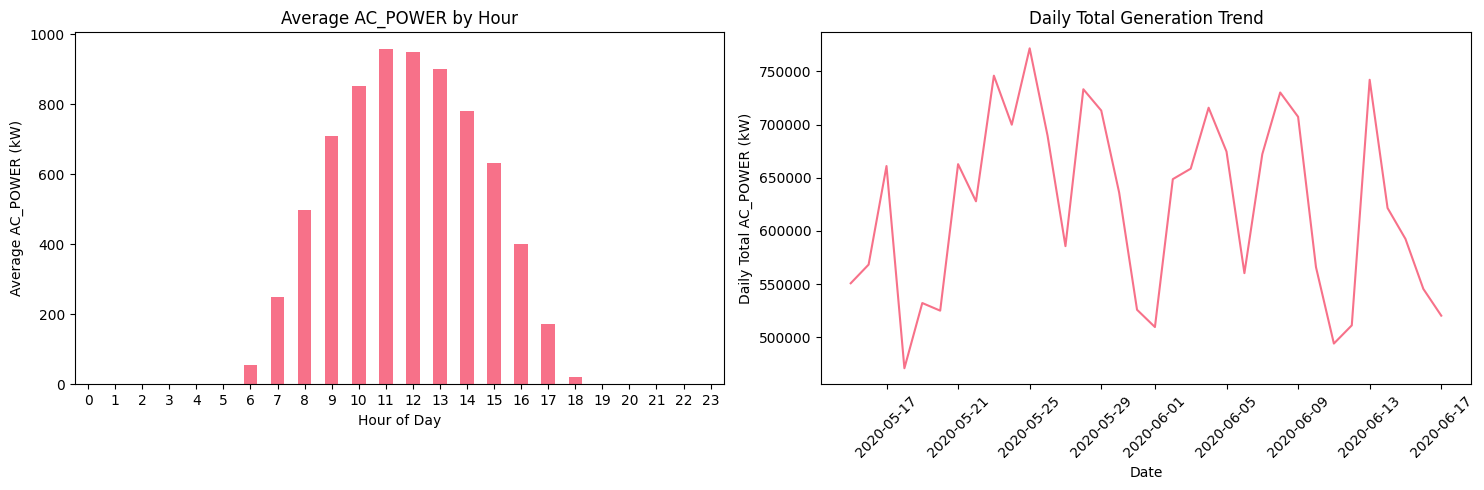

Peak generation hour: 11
Peak generation average: 957.69 kW


In [5]:
def analyze_temporal_patterns(gen_df: pd.DataFrame) -> None:
    """
    Analyze daily and hourly patterns in solar generation.
    
    Args:
        gen_df: Generation dataframe.
    """
    # Create time features
    df_temp = gen_df.copy()
    df_temp['hour'] = df_temp['DATE_TIME'].dt.hour
    df_temp['date'] = df_temp['DATE_TIME'].dt.date
    
    # Daily pattern
    hourly_avg = df_temp.groupby('hour')['AC_POWER'].mean()
    
    plt.figure(figsize=(15, 5))
    
    # Hourly pattern
    plt.subplot(1, 2, 1)
    hourly_avg.plot(kind='bar')
    plt.title('Average AC_POWER by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average AC_POWER (kW)')
    plt.xticks(rotation=0)
    
    # Daily totals trend
    plt.subplot(1, 2, 2)
    daily_totals = df_temp.groupby('date')['AC_POWER'].sum()
    daily_totals.plot()
    plt.title('Daily Total Generation Trend')
    plt.xlabel('Date')
    plt.ylabel('Daily Total AC_POWER (kW)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("Peak generation hour:", hourly_avg.idxmax())
    print("Peak generation average:", f"{hourly_avg.max():.2f} kW")

analyze_temporal_patterns(gen_df)

## 6. Weather Variables Analysis

=== WEATHER STATISTICS ===
       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count          3182.000000         3182.000000  3182.000000
mean             25.531606           31.091015     0.228313
std               3.354856           12.261222     0.300836
min              20.398505           18.140415     0.000000
25%              22.705182           21.090553     0.000000
50%              24.613814           24.618060     0.024653
75%              27.920532           41.307840     0.449588
max              35.252486           65.545714     1.221652


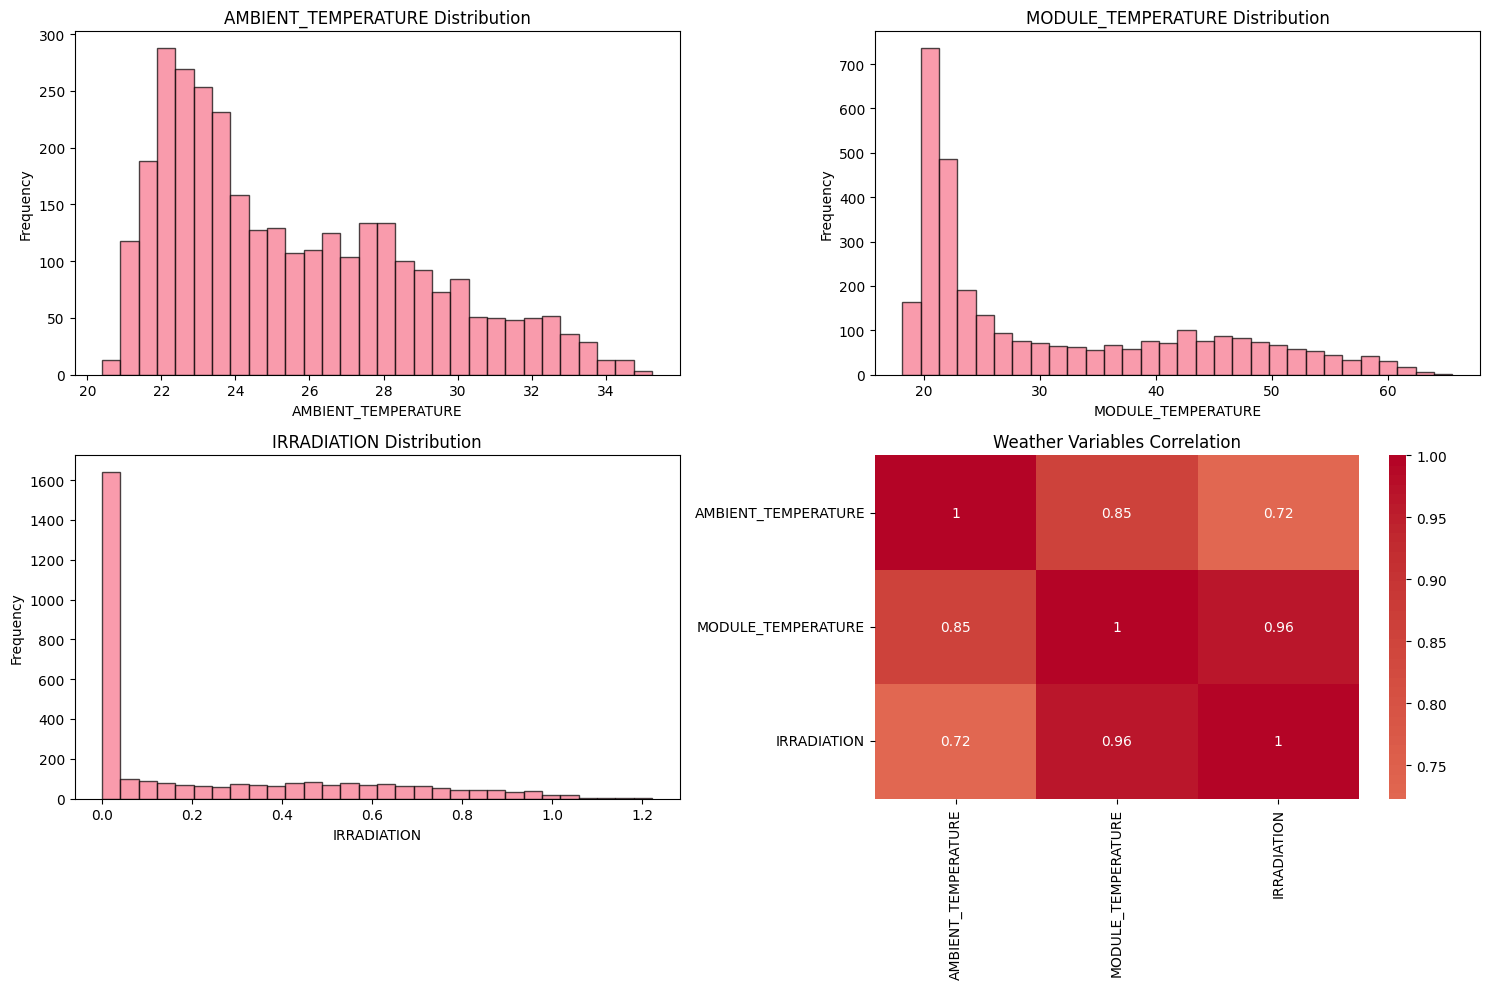

In [6]:
def analyze_weather_variables(weather_df: pd.DataFrame) -> None:
    """
    Analyze weather variables distribution and relationships.
    
    Args:
        weather_df: Weather dataframe.
    """
    weather_vars = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
    
    print("=== WEATHER STATISTICS ===")
    print(weather_df[weather_vars].describe())
    
    # Plot distributions
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, var in enumerate(weather_vars):
        axes[i].hist(weather_df[var], bins=30, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'{var} Distribution')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequency')
    
    # Correlation matrix
    corr_matrix = weather_df[weather_vars].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[3])
    axes[3].set_title('Weather Variables Correlation')
    
    plt.tight_layout()
    plt.show()

analyze_weather_variables(weather_df)

## 7. Generation-Weather Relationship

Merged dataset: 68,774 records

=== CORRELATIONS WITH AC_POWER ===
AC_POWER               1.000000
IRRADIATION            0.989340
AMBIENT_TEMPERATURE    0.724903
Name: AC_POWER, dtype: float64


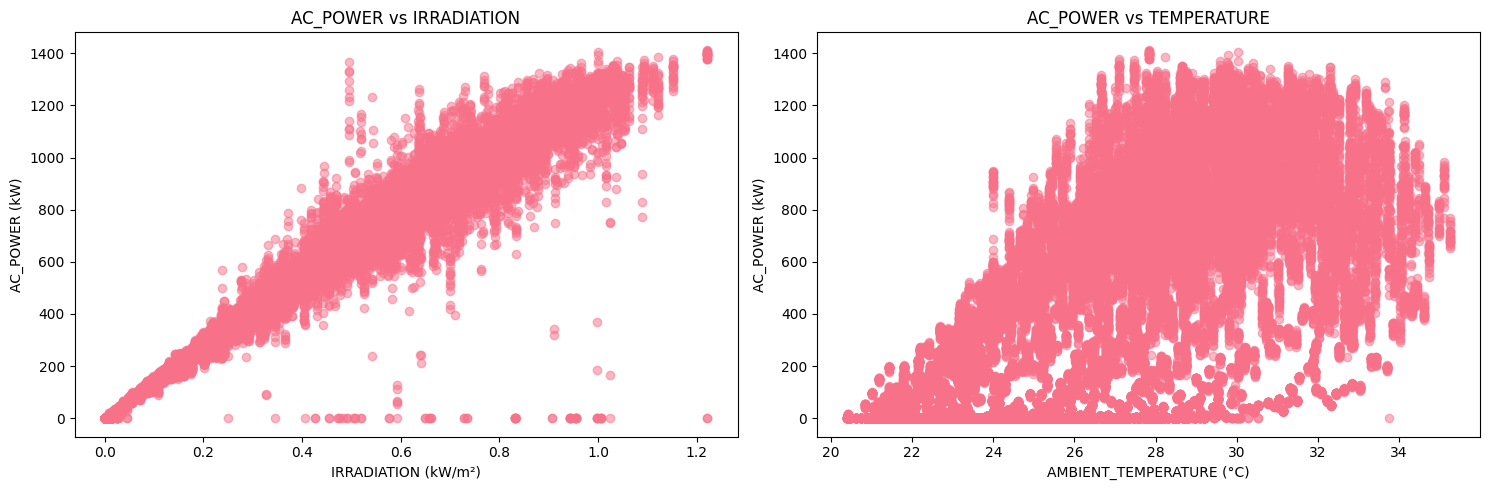

In [7]:
def analyze_generation_weather_relationship(gen_df: pd.DataFrame, weather_df: pd.DataFrame) -> None:
    """
    Analyze relationship between weather conditions and power generation.
    
    Args:
        gen_df: Generation dataframe.
        weather_df: Weather dataframe.
    """
    # Merge data for analysis (simple approach)
    merged_df = pd.merge(
        gen_df[['DATE_TIME', 'AC_POWER']], 
        weather_df[['DATE_TIME', 'IRRADIATION', 'AMBIENT_TEMPERATURE']], 
        on='DATE_TIME', 
        how='inner'
    )
    
    print(f"Merged dataset: {len(merged_df):,} records")
    
    # Correlation analysis
    correlations = merged_df[['AC_POWER', 'IRRADIATION', 'AMBIENT_TEMPERATURE']].corr()['AC_POWER']
    print("\n=== CORRELATIONS WITH AC_POWER ===")
    print(correlations)
    
    # Scatter plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # AC_POWER vs IRRADIATION
    ax1.scatter(merged_df['IRRADIATION'], merged_df['AC_POWER'], alpha=0.5)
    ax1.set_xlabel('IRRADIATION (kW/m²)')
    ax1.set_ylabel('AC_POWER (kW)')
    ax1.set_title('AC_POWER vs IRRADIATION')
    
    # AC_POWER vs TEMPERATURE
    ax2.scatter(merged_df['AMBIENT_TEMPERATURE'], merged_df['AC_POWER'], alpha=0.5)
    ax2.set_xlabel('AMBIENT_TEMPERATURE (°C)')
    ax2.set_ylabel('AC_POWER (kW)')
    ax2.set_title('AC_POWER vs TEMPERATURE')
    
    plt.tight_layout()
    plt.show()

analyze_generation_weather_relationship(gen_df, weather_df)

## 8. Key Insights Summary

In [8]:
def summarize_key_insights() -> Dict[str, Any]:
    """
    Summarize key insights for feature engineering.
    
    Returns:
        Dictionary with key insights.
    """
    insights = {
        "data_quality": {
            "generation_records": len(gen_df),
            "weather_records": len(weather_df),
            "time_coverage": f"{gen_df['DATE_TIME'].min()} to {gen_df['DATE_TIME'].max()}",
            "missing_values": "Minimal - data quality good"
        },
        "temporal_patterns": {
            "peak_hour": "Around midday (solar peak)",
            "daily_variation": "Strong diurnal pattern",
            "frequency": "15-minute intervals"
        },
        "feature_opportunities": {
            "temporal_features": ["hour", "day_of_year", "season"],
            "weather_features": ["irradiation", "temperature_diff"],
            "lagged_features": ["previous_day_generation"],
            "derived_features": ["irradiation_efficiency"]
        },
        "preprocessing_needs": {
            "frequency_conversion": "15-min to hourly",
            "weather_generation_join": "Required",
            "outlier_handling": "Check zero generation periods",
            "feature_scaling": "Recommended for ML models"
        }
    }
    
    print("=== KEY INSIGHTS SUMMARY ===")
    for category, details in insights.items():
        print(f"\n{category.upper().replace('_', ' ')}:")
        for key, value in details.items():
            print(f"  - {key}: {value}")
    
    return insights

insights = summarize_key_insights()

=== KEY INSIGHTS SUMMARY ===

DATA QUALITY:
  - generation_records: 68778
  - weather_records: 3182
  - time_coverage: 2020-05-15 00:00:00 to 2020-06-17 23:45:00
  - missing_values: Minimal - data quality good

TEMPORAL PATTERNS:
  - peak_hour: Around midday (solar peak)
  - daily_variation: Strong diurnal pattern
  - frequency: 15-minute intervals

FEATURE OPPORTUNITIES:
  - temporal_features: ['hour', 'day_of_year', 'season']
  - weather_features: ['irradiation', 'temperature_diff']
  - lagged_features: ['previous_day_generation']
  - derived_features: ['irradiation_efficiency']

PREPROCESSING NEEDS:
  - frequency_conversion: 15-min to hourly
  - weather_generation_join: Required
  - outlier_handling: Check zero generation periods
  - feature_scaling: Recommended for ML models
